In [10]:
import json

json_file = "log.json"
with open(json_file, "r") as f:
    data = json.load(f)
data

{'0': {'0': {'global': {'now_cpu': 200,
    'max_cpu': 200,
    'cpu_rate': 1.0,
    'now_memory': 256,
    'max_memory': 512,
    'memory_rate': 0.5}},
  '1': {'global': {'now_cpu': 100,
    'max_cpu': 200,
    'cpu_rate': 0.5,
    'now_memory': 128,
    'max_memory': 512,
    'memory_rate': 0.25}},
  '2': {'global': {'now_cpu': 200,
    'max_cpu': 200,
    'cpu_rate': 1.0,
    'now_memory': 256,
    'max_memory': 512,
    'memory_rate': 0.5}}},
 '1': {'0': {'global': {'now_cpu': 200,
    'max_cpu': 200,
    'cpu_rate': 1.0,
    'now_memory': 256,
    'max_memory': 512,
    'memory_rate': 0.5}},
  '1': {'global': {'now_cpu': 100,
    'max_cpu': 200,
    'cpu_rate': 0.5,
    'now_memory': 128,
    'max_memory': 512,
    'memory_rate': 0.25}}},
 '10': {'0': {'global': {'now_cpu': 200,
    'max_cpu': 200,
    'cpu_rate': 1.0,
    'now_memory': 256,
    'max_memory': 512,
    'memory_rate': 0.5}},
  '1': {'global': {'now_cpu': 200,
    'max_cpu': 200,
    'cpu_rate': 1.0,
    'now_memory'

[0, 1, 2] [1.0, 0.5, 1.0] [0.5, 0.25, 0.5]
[0, 1, 2] [1.0, 0.5, 0] [0.5, 0.25, 0]
[0, 1, 2] [1.0, 1.0, 0] [0.5, 0.5, 0]


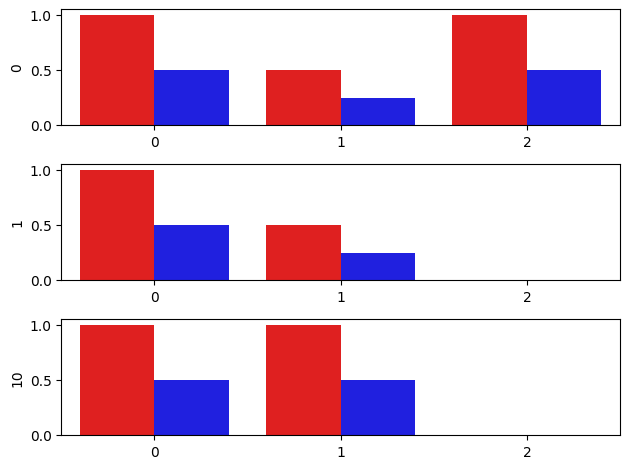

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

timestamp_list = list(data.keys())
tmp_data_list = list(data.values())

n = len(timestamp_list)
max_node_id = max([max([int(j) for j in list(i.keys())]) for i in tmp_data_list[:-1]]) # 最大的node_id
fig, ax = plt.subplots(n-1,1)

# 遍历所有帧
for i in range(n-1):
    timestamp = timestamp_list[i]
    tmp_data = tmp_data_list[i]
    # print(timestamp)
    # 数据构造
    node_id_list = []
    cpu_rate_list = []
    memory_rate_list = []
    for k, v in tmp_data.items():
        node_id_list.append(int(k))
        cpu_rate_list.append(v["global"]["cpu_rate"])
        memory_rate_list.append(v["global"]["memory_rate"])
    for j in range(max_node_id+1):
        if j not in node_id_list:
            node_id_list.append(j)
            cpu_rate_list.append(0)
            memory_rate_list.append(0)
    df = pd.DataFrame({"node_id": node_id_list,
                   "cpu_rate": cpu_rate_list,
                   "memory_rate": memory_rate_list})
    # 可视化
    sns.barplot(x="node_id", y="value", hue="variable", data=pd.melt(df, ["node_id"]), 
                ax=ax[i], legend=False, palette=["#FF0000", "#0000FF"])
    ax[i].set_xlabel("")
    ax[i].set_ylabel(timestamp)
    print(node_id_list, cpu_rate_list, memory_rate_list)
        

# 展示图形
plt.tight_layout()
plt.show()